<a href="https://colab.research.google.com/github/Fatihmaull/multiple-regression-NYSE-analysis/blob/main/nyse_closing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving fundamentals.csv to fundamentals.csv
Saving prices.csv to prices.csv
Saving prices-split-adjusted.csv to prices-split-adjusted.csv
Saving securities.csv to securities.csv


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm


In [8]:
# Load data
fundamentals = pd.read_csv("fundamentals.csv")
prices = pd.read_csv("prices-split-adjusted.csv")

# Hitung rata-rata harga per saham
price_avg = prices.groupby("symbol")[["open", "close", "high", "low", "volume"]].mean().reset_index()

# Ambil data fundamental terakhir
latest_fund = fundamentals.sort_values("Period Ending").drop_duplicates("Ticker Symbol", keep="last")

# Gabungkan
df = pd.merge(price_avg, latest_fund, left_on="symbol", right_on="Ticker Symbol")

# Pilih fitur
features = ['open', 'high', 'low', 'volume']
target = 'close'

df_model = df[features + [target]].dropna()

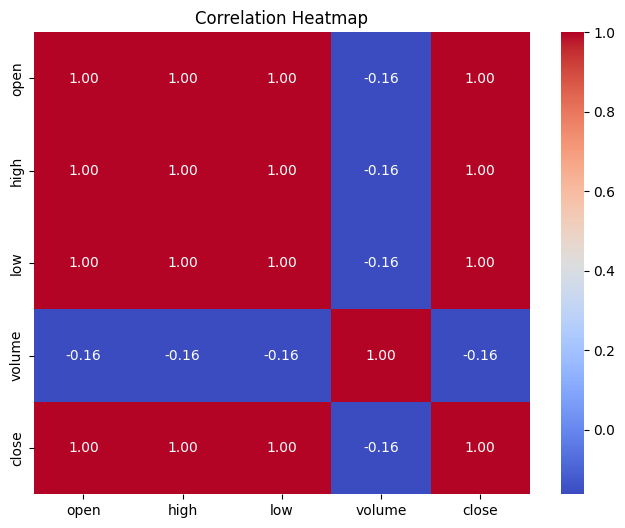

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


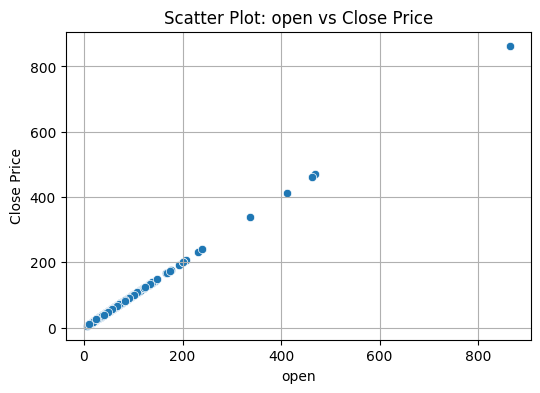

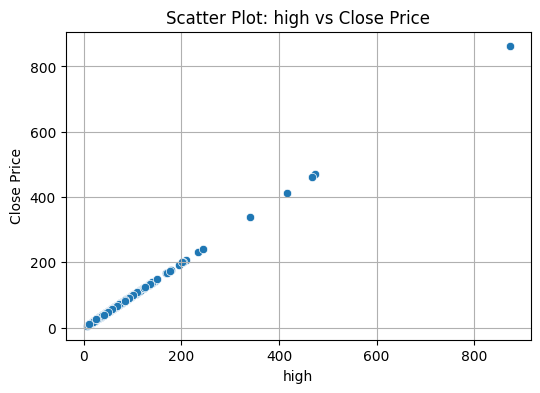

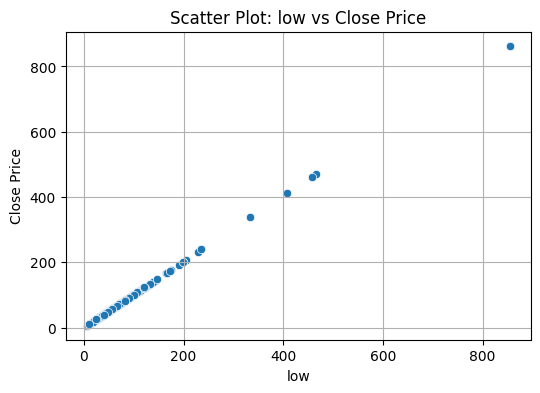

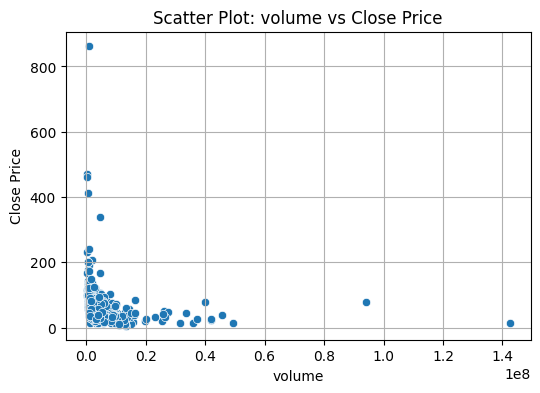

In [10]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_model[col], y=df_model['close'])
    plt.title(f'Scatter Plot: {col} vs Close Price')
    plt.xlabel(col)
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.show()


In [11]:
# Pisah data
X = df_model[features]
y = df_model['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(features, model.coef_)))
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Intercept: 0.004920436761821634
Coefficients: {'open': np.float64(0.13482346946615983), 'high': np.float64(0.42178734544332913), 'low': np.float64(0.44393182721031943), 'volume': np.float64(-2.5000590486712326e-10)}
R² Score: 0.9999999445137333
RMSE: 0.014349868877529


In [12]:
# Tambahkan konstanta untuk OLS
X_ols = sm.add_constant(X)
ols_model = sm.OLS(y, X_ols).fit()

# Ringkasan model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.058e+09
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:32:46   Log-Likelihood:                 1262.6
No. Observations:                 447   AIC:                            -2515.
Df Residuals:                     442   BIC:                            -2495.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0042      0.001      3.803      0.0

In [14]:
# sekarang, bukan hanya variable teknikal yang digunakan, tapi juga variabel fundamental perusahaan
# Load data
fundamentals = pd.read_csv("fundamentals.csv")
prices = pd.read_csv("prices-split-adjusted.csv")

# Hitung rata-rata harga per saham
price_avg = prices.groupby("symbol")[["open", "close", "high", "low", "volume"]].mean().reset_index()

# Ambil data fundamental terakhir
latest_fund = fundamentals.sort_values("Period Ending").drop_duplicates("Ticker Symbol", keep="last")

# Gabungkan
df = pd.merge(price_avg, latest_fund, left_on="symbol", right_on="Ticker Symbol")

# Pilih fitur
# Tambahan variabel fundamental ke dalam model
features = [
    'open', 'high', 'low', 'volume',
    'Total Revenue', 'Net Income',
    'Total Assets', 'Total Liabilities', 'Total Equity'
]
target = 'close'

# semua nilai tidak null
df_model = df[features + [target]].dropna()

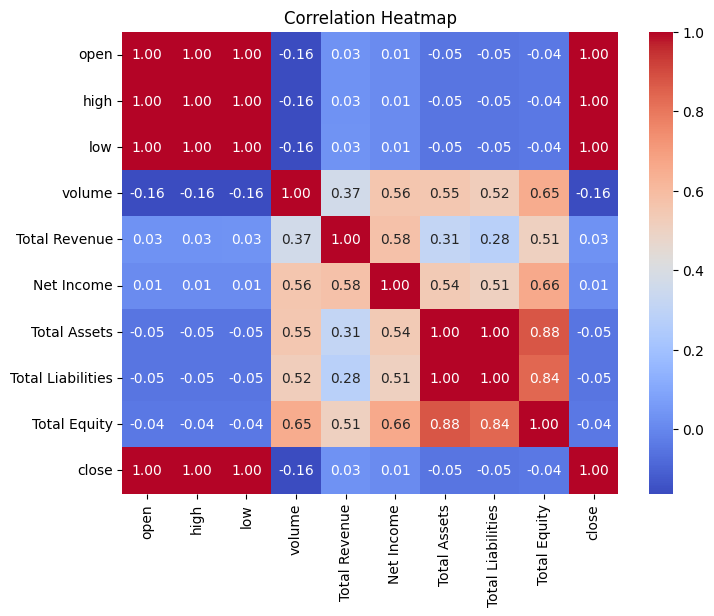

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df_model.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


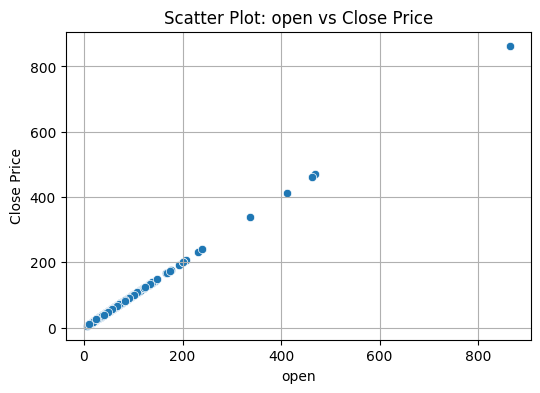

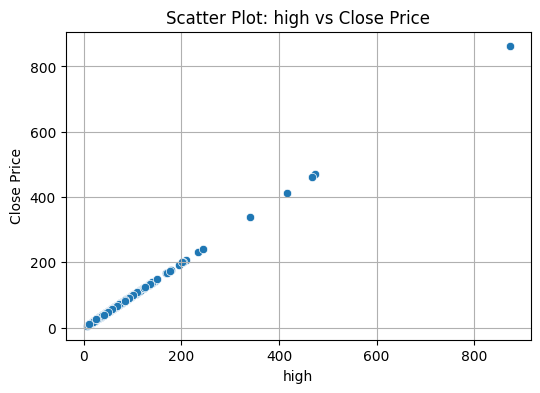

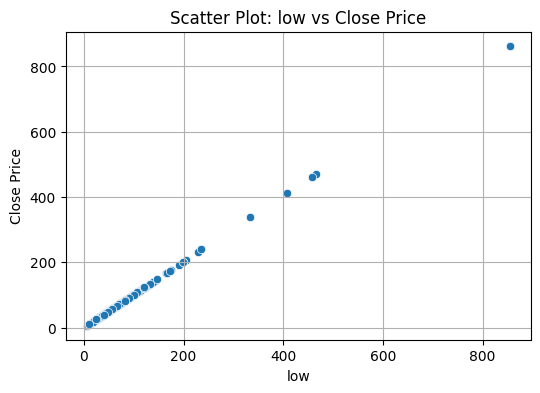

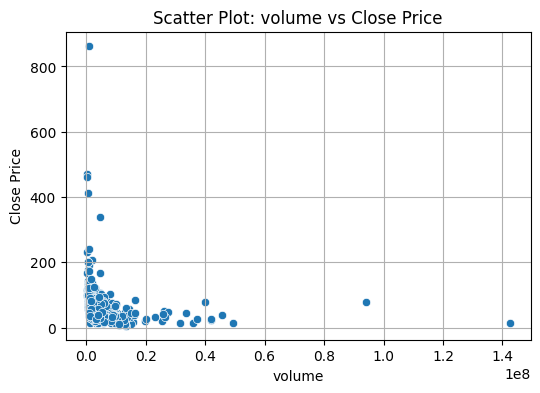

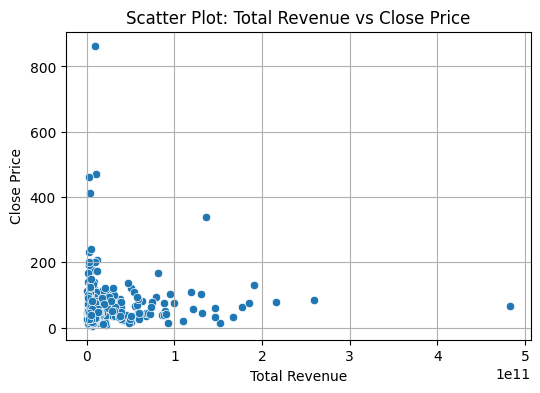

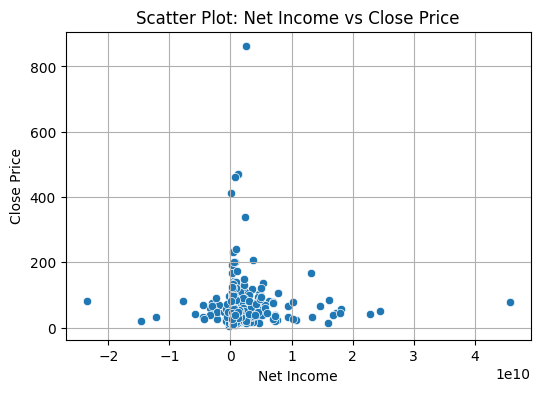

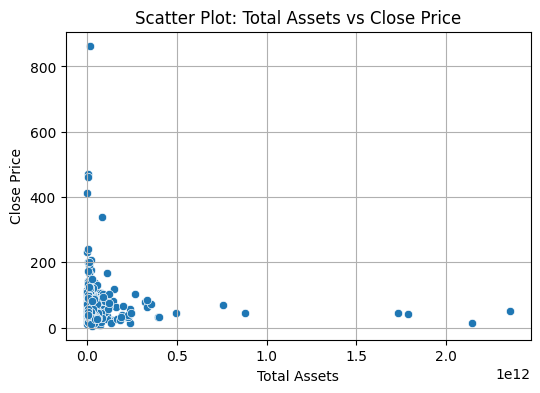

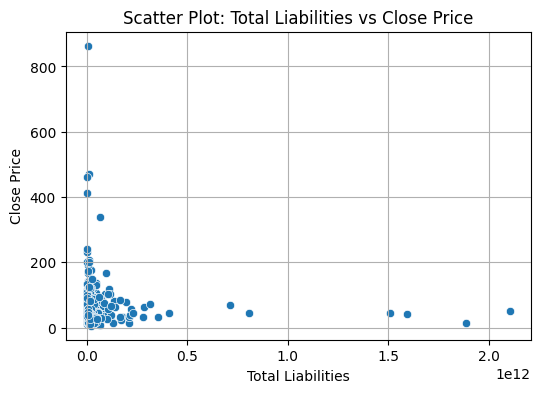

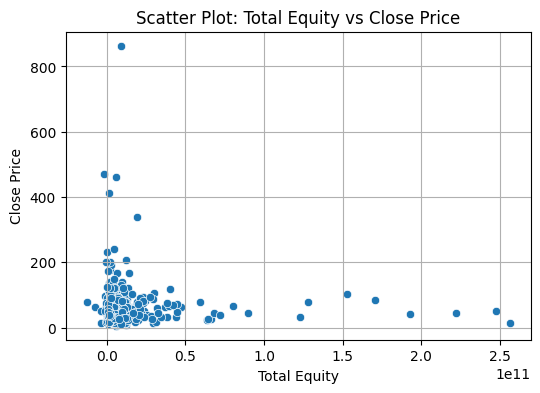

In [16]:
for col in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_model[col], y=df_model['close'])
    plt.title(f'Scatter Plot: {col} vs Close Price')
    plt.xlabel(col)
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.show()


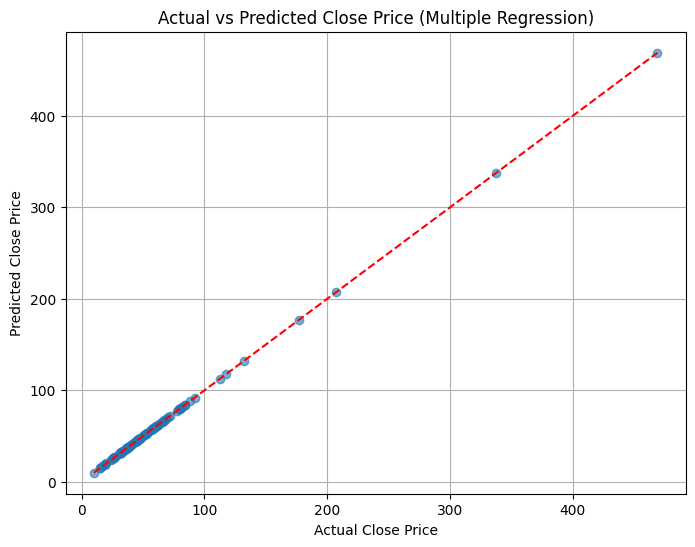

In [17]:
# Scatter plot antara prediksi vs aktual data

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price (Multiple Regression)")
plt.grid(True)
plt.show()


In [18]:
# Pisah data
X = df_model[features]
y = df_model['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(features, model.coef_)))
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Intercept: 0.006028096437290742
Coefficients: {'open': np.float64(0.3327700141080982), 'high': np.float64(0.3161767493751775), 'low': np.float64(0.35171227310821396), 'volume': np.float64(-2.3164500956377723e-10), 'Total Revenue': np.float64(-5.1137913348320296e-14), 'Net Income': np.float64(5.3601654365076357e-14), 'Total Assets': np.float64(2.0935475575356577e-12), 'Total Liabilities': np.float64(-2.086719685934213e-12), 'Total Equity': np.float64(-2.1316420850681084e-12)}
R² Score: 0.9999999405476433
RMSE: 0.014853873386929055


In [19]:
# Tambahkan konstanta untuk OLS
X_ols = sm.add_constant(X)
ols_model = sm.OLS(y, X_ols).fit()

# Ringkasan model
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.091e+08
Date:                Fri, 27 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:37:53   Log-Likelihood:                 1263.9
No. Observations:                 447   AIC:                            -2508.
Df Residuals:                     437   BIC:                            -2467.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0043      0.00

In [20]:
# Import library VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ambil X data (tanpa target)
X_vif = df_model.drop(columns=['close'])

# Tambahkan konstanta (intercept)
X_vif_const = add_constant(X_vif)

# Hitung VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i)
                   for i in range(X_vif_const.shape[1])]

vif_data


,Feature,VIF
0,const,2.692583e+00
1,open,9.450825e+06
2,high,2.717988e+06
3,low,2.091953e+06
4,volume,1.978032e+00
5,Total Revenue,1.734996e+00
6,Net Income,2.272981e+00
7,Total Assets,2.426325e+06
8,Total Liabilities,1.899815e+06
9,Total Equity,4.364734e+04


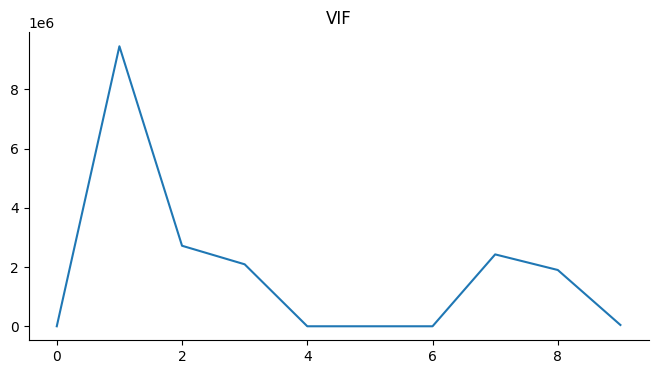

In [21]:
# @title VIF

from matplotlib import pyplot as plt
vif_data['VIF'].plot(kind='line', figsize=(8, 4), title='VIF')
plt.gca().spines[['top', 'right']].set_visible(False)

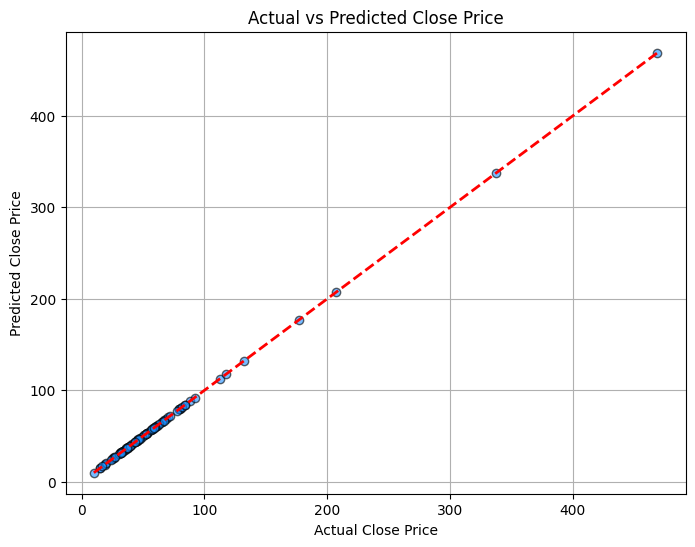

In [22]:
# Visualisasi scatter actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.grid(True)
plt.show()
